In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [ ]:
df.shape

(6362620, 11)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
legit=df[df.isFraud==0]
fraud=df[df.isFraud==1]

In [ ]:
print(legit)


         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815       170136.0   
1           1   PAYMENT    1864.28  C1666544295        21249.0   
4           1   PAYMENT   11668.14  C2048537720        41554.0   
5           1   PAYMENT    7817.71    C90045638        53860.0   
6           1   PAYMENT    7107.77   C154988899       183195.0   
...       ...       ...        ...          ...            ...   
6362319   718   PAYMENT    8634.29   C642813806       518802.0   
6362320   718  CASH_OUT  159188.22   C691808084         3859.0   
6362321   718  CASH_OUT  186273.84   C102120699       168046.0   
6362322   718  TRANSFER   82096.45   C614459560        13492.0   
6362323   718     DEBIT    1864.24    C49652609        20426.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

In [ ]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [ ]:
#Statistical Measure of data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [ ]:
legit_sample = legit.sample(n=8213)
nd=pd.concat([legit_sample,fraud],axis=0)
nd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
190639,13,PAYMENT,25106.47,C21775601,0.0,0.00,M917810874,0.00,0.00,0,0
4821236,346,CASH_IN,67662.49,C2031944091,610645.6,678308.09,C42644752,306708.82,239046.32,0,0
1532729,154,CASH_OUT,327145.28,C487584033,0.0,0.00,C1923170825,7216197.10,7543342.38,0,0
4376505,311,PAYMENT,6960.98,C1431656257,7053.0,92.02,M1202036197,0.00,0.00,0,0
3534836,259,PAYMENT,6093.06,C272703582,0.0,0.00,M1219587223,0.00,0.00,0,0


In [ ]:
nd['isFraud'].value_counts()


isFraud
0    8213
1    8213
Name: count, dtype: int64

In [ ]:
#dplitting the dta into features and targets
#list_drop = [','nameOrig']

#x=nd.drop(columns='type',axis=1)
#y=nd['type']"
x=nd.drop(['nameOrig','type','nameDest'],axis=1)
y=nd['type']

In [ ]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
190639,13,25106.47,0.0,0.00,0.00,0.00,0,0
4821236,346,67662.49,610645.6,678308.09,306708.82,239046.32,0,0
1532729,154,327145.28,0.0,0.00,7216197.10,7543342.38,0,0
4376505,311,6960.98,7053.0,92.02,0.00,0.00,0,0
3534836,259,6093.06,0.0,0.00,0.00,0.00,0,0


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(16426, 8) (13140, 8) (3286, 8)


In [ ]:
#logistic regression
model=LogisticRegression()
#training logistic regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy score on training data:")
print( training_data_accuracy)


accuracy score on training data:
0.7743531202435312


In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("accuracy on test data:")
print(test_data_accuracy)

accuracy on test data:
0.7811929397443701


In [ ]:
df1 = df.rename(columns={'nameOrig':'nameorig','oldbalanceOrg':'oldbalanceorig','newbalanceOrig':'newbalanceorig','nameDest':'namedest'
    ,'oldbalanceDest':'oldbalancedest','newbalanceDest':'newbalancedest'})
df1.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorig',
       'newbalanceorig', 'namedest', 'oldbalancedest', 'newbalancedest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
df2 = df1.copy(deep = 'true')
df2['type']=df2['type'].map({'PAYMENT':1 ,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})
df2 = df2.drop(columns = ['nameorig','namedest','isFraud','isFlaggedFraud'])
df2.head()

,step,type,amount,oldbalanceorig,newbalanceorig,oldbalancedest,newbalancedest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df2.columns
    vif["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]

    return(vif)

calc_vif(df1)


,variables,VIF
0,step,2.466060
1,type,3.251976
2,amount,4.129854
3,oldbalanceorig,501.282300
4,newbalanceorig,508.906801
5,oldbalancedest,73.377939
6,newbalancedest,84.656570


# As we can see, old balance and new balance have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the transaction happens does changes their values. Hence, considering these two features together leads to a model with high multicollinearity.

# **VISUALISATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

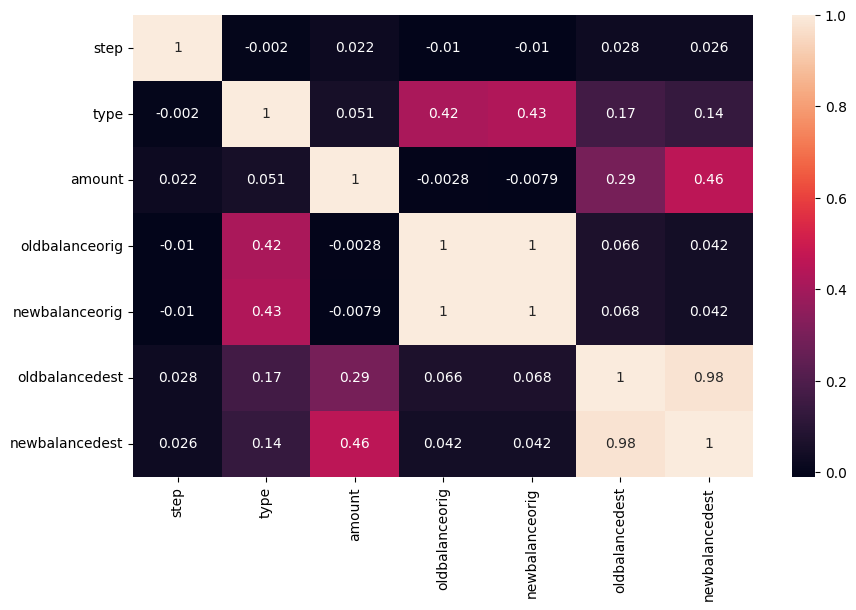

In [ ]:
corr=df2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# **NUMBER OF LEGIT AND FRAUD TRANSACTIONS**

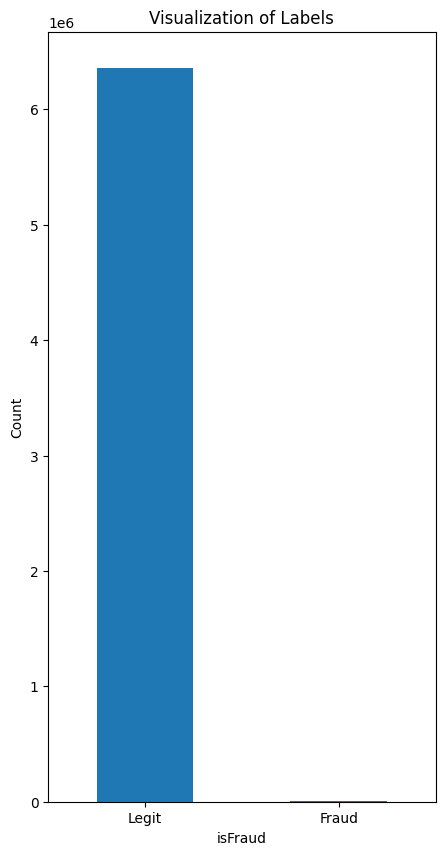

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

 1.) which type of transactions are fraud using isFraud - There are 2 flags From those,isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.